In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from tqdm import tqdm
from cp_functions import *
from scipy.optimize import minimize

# Comparison of policies

In [2]:
T = 30
init = [1, 1, 1]
W_current = [2, 2, 2]
W_bar = [2, 2, 2]
Q = [0.6, 0.7, 0.5]
C = [6, 4, 3, 4, 6]
D = [100, 100, 100]
alpha = [0.5, 0.5, 0.5]

In [3]:
upper = solve_cp_post(T, init, W_current, W_bar, Q, C, D, alpha)[0]
print("rel is "+str(upper))

rel is 323.520494439257


In [ ]:
T = 30
my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
for sigma in my_sigma:
    perfs = []
    counts = []
    for _ in tqdm(range(400)):
        perf,count = hybrid_policy(T, init, 0., W_current, W_bar, Q, C, D, alpha, sigma, count = 0, thres = 1.5)
        perfs.append(perf)
        counts.append(count)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    mean_count = np.mean(counts)
    std_count = np.std(counts)/np.sqrt(len(counts)-1)
    print("sigma = " + str(sigma) + ", optimality gap of hybrid is: " + str(gap) + " +- " + str(2*std_err))
    print("sigma = " + str(sigma) + ", resolving counts of hybrid is: " + str(mean_count) + " +- " + str(2*std_count))

The Projection Policy

In [7]:
T = 30
my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [08:45<00:00,  1.31s/it]


sigma = 0.1, optimality gap of projection is: 3.779094662666239 +- 0.09219906109427405


100%|██████████| 400/400 [08:50<00:00,  1.33s/it]


sigma = 0.2, optimality gap of projection is: 7.840320754324296 +- 0.17725997975822327


100%|██████████| 400/400 [09:23<00:00,  1.41s/it]


sigma = 0.3, optimality gap of projection is: 11.834461835666616 +- 0.23568836373341567


100%|██████████| 400/400 [08:56<00:00,  1.34s/it]


sigma = 0.4, optimality gap of projection is: 15.431781204237325 +- 0.30743313235919256


100%|██████████| 400/400 [08:49<00:00,  1.32s/it]


sigma = 0.5, optimality gap of projection is: 19.006509927404068 +- 0.38494369354128033


100%|██████████| 400/400 [08:54<00:00,  1.34s/it]


sigma = 0.75, optimality gap of projection is: 27.933999009688478 +- 0.4949934591449486


100%|██████████| 400/400 [08:55<00:00,  1.34s/it]

sigma = 1.0, optimality gap of projection is: 33.56407740475231 +- 0.5607304536386369


In [5]:
T = 30
my_sigma = [2.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

100%|██████████| 400/400 [08:32<00:00,  1.28s/it]

sigma = 2.0, optimality gap of projection is: 41.511058266218754 +- 0.7061441744074932


In [4]:
T = 30
my_sigma = [50.]
for sigma in my_sigma:
    perfs = []
    for _ in tqdm(range(400)):
        perf = projection_policy(T, init, 0., W_bar, Q, C, D, alpha, sigma)
        perfs.append(perf)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    print("sigma = " + str(sigma) + ", optimality gap of projection is: " + str(gap) + " +- " + str(2*std_err))

  3%|▎         | 12/400 [00:27<15:14,  2.36s/it]C:\Users\cyan\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 400/400 [14:45<00:00,  2.21s/it]

sigma = 50.0, optimality gap of projection is: 45.57584392368983 +- 0.7000790015542477


In [6]:
T = 30
#my_sigma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
#my_theta = [0.4, 0.8, 1.2, 1.6, 2.0, 2.5, 3., 4.]
my_sigma = [0.1, 0.2, 0.3, 0.4]
my_theta = [0.4, 0.8, 1.2, 1.6]
for i,sigma in enumerate(my_sigma):
    perfs = []
    counts = []
    theta = my_theta[i]
    for _ in tqdm(range(400)):
        perf,count = hybrid_policy(T, init, 0., W_current, W_bar, Q, C, D, alpha, sigma, count = 0, thres = theta)
        perfs.append(perf)
        counts.append(count)
    gap = upper - np.mean(perfs)
    std_err = np.std(perfs)/np.sqrt(len(perfs)-1)
    mean_count = np.mean(counts)
    std_count = np.std(counts)/np.sqrt(len(counts)-1)
    print("sigma = " + str(sigma) + ", optimality gap of hybrid is: " + str(gap) + " +- " + str(2*std_err))
    print("sigma = " + str(sigma) + ", resolving counts of hybrid is: " + str(mean_count) + " +- " + str(2*std_count))

100%|██████████| 400/400 [48:57<00:00,  7.34s/it]


sigma = 0.1, optimality gap of hybrid is: 1.6416123472832282 +- 0.03762840532414709
sigma = 0.1, resolving counts of hybrid is: 14.71 +- 0.2545997891428407


100%|██████████| 400/400 [50:39<00:00,  7.60s/it]


sigma = 0.2, optimality gap of hybrid is: 3.740784098840038 +- 0.08864766490269418
sigma = 0.2, resolving counts of hybrid is: 15.0975 +- 0.2714113073259125


100%|██████████| 400/400 [54:27<00:00,  8.17s/it]


sigma = 0.3, optimality gap of hybrid is: 6.232779010619595 +- 0.12516566921375472
sigma = 0.3, resolving counts of hybrid is: 14.9125 +- 0.2719067315766414


100%|██████████| 400/400 [49:03<00:00,  7.36s/it]

sigma = 0.4, optimality gap of hybrid is: 9.051675187668593 +- 0.17526187465293427
sigma = 0.4, resolving counts of hybrid is: 14.445 +- 0.25521085684906525


Plot!

In [2]:
my_sigma = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]
hybrid = [0., 3.75499668830048, 7.556190402722791, 8.397893451900018, 8.353696834761422, 9.455792667389801, 13.723387846299602, 
          17.045292004638213, 22.422649245847424]
hybrid_ci = [0., 0.0864348419086881, 0.15967201275918638, 0.1643005804233756, 0.17859631452126845, 0.2187034454206803, 0.3280635903957955,
            0.4247801755548853, 0.5021385075770816]
projection = [0., 3.779094662666239, 7.840320754324296, 11.834461835666616, 15.431781204237325, 19.006509927404068,
             27.933999009688478, 33.56407740475231, 41.511058266218754]
projection_ci = [0., 0.09219906109427405, 0.17725997975822327, 0.23568836373341567, 0.30743313235919256,
                0.38494369354128033, 0.4949934591449486, 0.5607304536386369, 0.7061441744074932]
update = [0., 0.6751724000587274, 1.785608100718548, 3.5096707400443847, 5.459479596568883, 7.670634010252172,
         12.948077942456393, 16.82817815804907, 22.198738525815486]
update_ci = [0., 0.0284472199839743, 0.05978098879254324, 0.11913526304423622, 0.15754489654769221, 
            0.2150031057950384, 0.32913629277701, 0.3949186834446812, 0.5169044969707984]

In [ ]:
myopic = [11.357676070885248, 11.401668532083704, 12.005599689895234, 13.92682047821421, 16.7393893696094, 20.37330959385332, 
          29.162374293247353, 34.65782484111173, 42.396547307764195]
myopic_ci = [0., 0.015496018275286056, 0.05334801905714205, 0.13651943488775112, 0.26226986034593697, 
             0.37805996400213815, 0.5828905111648925, 0.6615687497411535, 0.8489865804329587]

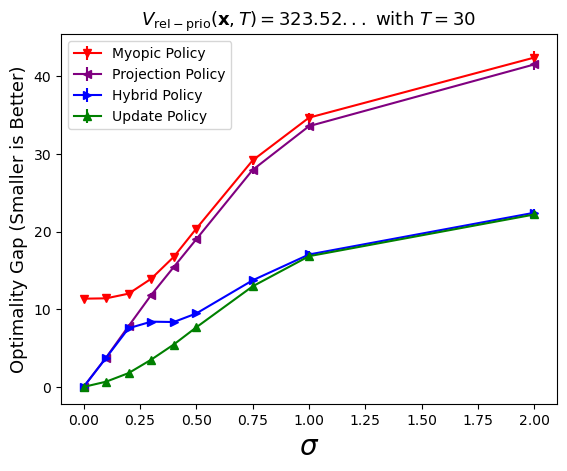

In [2]:
# Data
my_sigma = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1., 2.]

myopic = [11.357676070885248, 11.401668532083704, 12.005599689895234, 13.92682047821421, 16.7393893696094, 20.37330959385332, 
          29.162374293247353, 34.65782484111173, 42.396547307764195]
myopic_ci = [0., 0.015496018275286056, 0.05334801905714205, 0.13651943488775112, 0.26226986034593697, 
             0.37805996400213815, 0.5828905111648925, 0.6615687497411535, 0.8489865804329587]

projection = [0., 3.779094662666239, 7.840320754324296, 11.834461835666616, 15.431781204237325, 19.006509927404068, 27.933999009688478, 33.56407740475231, 41.511058266218754]
projection_ci = [0., 0.09219906109427405, 0.17725997975822327, 0.23568836373341567, 0.30743313235919256, 0.38494369354128033, 0.4949934591449486, 0.5607304536386369, 0.7061441744074932]

hybrid = [0., 3.75499668830048, 7.556190402722791, 8.397893451900018, 8.353696834761422, 9.455792667389801, 13.723387846299602, 
          17.045292004638213, 22.422649245847424]
hybrid_ci = [0., 0.0864348419086881, 0.15967201275918638, 0.1643005804233756, 0.17859631452126845, 0.2187034454206803, 0.3280635903957955,
            0.4247801755548853, 0.5021385075770816]

update = [0., 0.6751724000587274, 1.785608100718548, 3.5096707400443847, 5.459479596568883, 7.670634010252172, 12.948077942456393, 16.82817815804907, 22.198738525815486]
update_ci = [0., 0.0284472199839743, 0.05978098879254324, 0.11913526304423622, 0.15754489654769221, 0.2150031057950384, 0.32913629277701, 0.3949186834446812, 0.5169044969707984]

# Create a new figure
plt.figure()

# Plot the data with error bars
# Plot the data with error bars
plt.errorbar(my_sigma, myopic, yerr=myopic_ci, fmt='-v', label="Myopic Policy", color = "r")
plt.errorbar(my_sigma, projection, yerr=projection_ci, fmt='-<', label="Projection Policy", color = "purple")
plt.errorbar(my_sigma, hybrid, yerr=hybrid_ci, fmt='->', label="Hybrid Policy", color = "b")
plt.errorbar(my_sigma, update, yerr=update_ci, fmt='-^', label="Update Policy", color = "g")

# Label the axes and create a legend
plt.xlabel("$\sigma$", size=20)
plt.ylabel("Optimality Gap (Smaller is Better)", size=13)
plt.title("$V_{\mathrm{rel-prio}} (\mathbf{x},T) = 323.52...$ with $T=30$",size=13)
plt.legend()



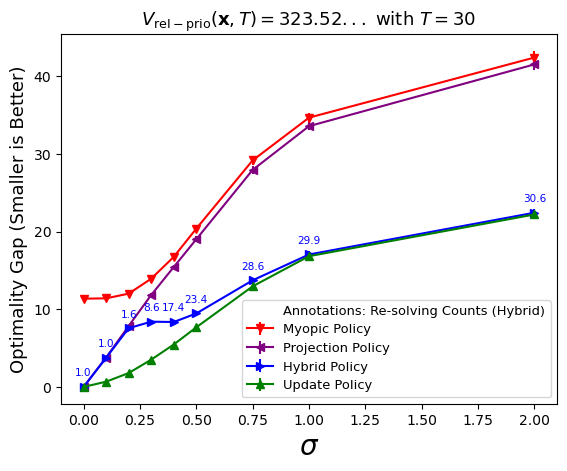

In [4]:
# Create a new figure
plt.figure()

# Plot the data with error bars
plt.errorbar(my_sigma, myopic, yerr=myopic_ci, fmt='-v', label="Myopic Policy", color = "r")
plt.errorbar(my_sigma, projection, yerr=projection_ci, fmt='-<', label="Projection Policy",color="purple")
plt.errorbar(my_sigma, hybrid, yerr=hybrid_ci, fmt='->', label="Hybrid Policy", color = "b")
plt.errorbar(my_sigma, update, yerr=update_ci, fmt='-^', label="Update Policy", color = "g")

# Label the axes and create a legend
plt.xlabel("$\sigma$", size=20)
plt.ylabel("Optimality Gap (Smaller is Better)", size=13)
plt.title("$V_{\mathrm{rel-prio}} (\mathbf{x},T) = 323.52...$ with $T=30$",size=13)

# Annotate resolve times
resolve_times = [1., 1., 1.6, 8.6, 17.4, 23.4, 28.6, 29.9, 30.6]
for i, txt in enumerate(resolve_times):
    plt.annotate(txt, (my_sigma[i], hybrid[i]), textcoords="offset points", xytext=(0,8), ha='center', fontsize=7.5, color="b")

# Create an empty plot element for the annotation legend entry
plt.plot([], [], ' ', label="Annotations: Re-solving Counts (Hybrid)")

# Create the legend
plt.legend(fontsize=9.4)


plt.savefig("perf-compare-1.pdf", bbox_inches='tight')

Fix $\sigma=2$ and Control $\Theta$

In [ ]:
my_theta =  [0.5, 1.0, 1.5, 2.5, 3., 3.5, 4., 4.5]
hybrid = [16.455337596996742, 16.797333874480273, 16.698161105827296, 19.400790748456757, 21.70224364626415, 24.088014858432473, 
          26.640729458493524, 29.154925942070747]
hybrid_ci = [0.3956903967819357, 0.43216205616847464, 0.4011062735957083, 0.4231750090445365, 0.44385987021762496, 0.43144301458160916,
            0.4555152258326052, 0.4591166799694024]
resolve_count = [30.0, 29.8, 29.0, 22.2, 17.0, 11.7, 7.0, 4.0]

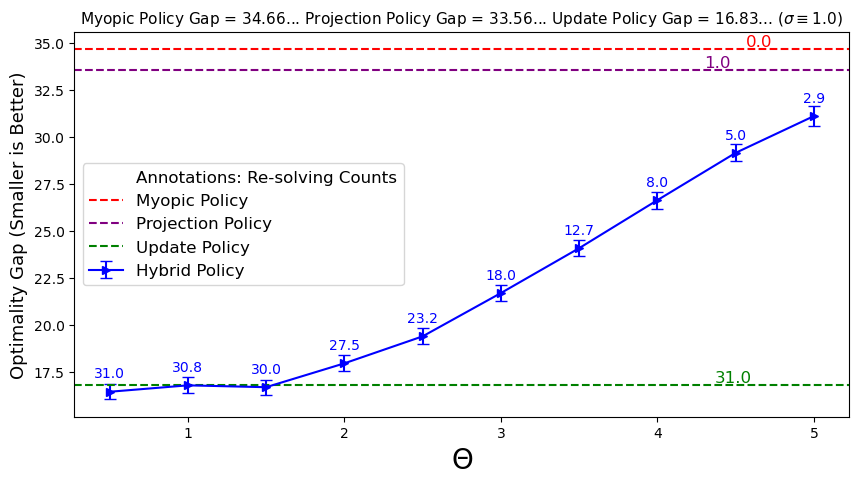

In [54]:
my_theta = [0.5, 1.0, 1.5, 2.0, 2.5, 3., 3.5, 4., 4.5, 5.0]
hybrid = [16.455337596996742, 16.797333874480273, 16.698161105827296, 17.966035942529857, 19.400790748456757, 21.70224364626415, 
          24.088014858432473, 26.640729458493524, 29.154925942070747, 31.10947721443864]
hybrid_ci = [0.3956903967819357, 0.43216205616847464, 0.4011062735957083, 0.4325111553024653, 0.4231750090445365, 0.44385987021762496, 
             0.43144301458160916, 0.4555152258326052, 0.4591166799694024, 0.5080917109219812]
resolve_count = [31.0, 30.8, 30.0, 27.5, 23.2, 18.0, 12.7, 8.0, 5.0, 2.9]

myopic_policy = 34.65782484111173
projection_policy = 33.56407740475231
update_policy = 16.82817815804907

plt.figure(figsize=(10, 5)) 

# Create an empty plot element for the annotation legend entry
plt.plot([], [], ' ', label="Annotations: Re-solving Counts")

plt.axhline(y=myopic_policy, color='r', linestyle='--', label="Myopic Policy")
plt.axhline(y=projection_policy, color='purple', linestyle='--', label="Projection Policy")
plt.errorbar(my_theta, hybrid, yerr=hybrid_ci, capsize=4, marker='>', linestyle='-', label="Hybrid Policy", color="b")
for i, rc in enumerate(resolve_count):
    plt.annotate(str(rc), (my_theta[i], hybrid[i]), textcoords="offset points", xytext=(0,10), ha='center', color = "b")
plt.xlabel("$\Theta$", size=20)
plt.ylabel("Optimality Gap (Smaller is Better)", size=13)
plt.title('Myopic Policy Gap = 34.66... Projection Policy Gap = 33.56... Update Policy Gap = 16.83... ($\sigma \equiv 1.0$)', size = 11)

plt.annotate('0.0', xy=(max(my_theta), myopic_policy), xytext=(-30, 5), 
             textcoords='offset points', ha='right', va='center', size=12, color='r')
plt.annotate('1.0', xy=(max(my_theta), projection_policy), xytext=(-60, 5), 
             textcoords='offset points', ha='right', va='center', size=12, color='purple')
plt.annotate('31.0', xy=(max(my_theta), update_policy), xytext=(-45, 5), 
             textcoords='offset points', ha='right', va='center', size=12, color='g')
plt.axhline(y=update_policy, color='g', linestyle='--', label="Update Policy")


# Create the legend
plt.legend(fontsize = 12)

plt.savefig("perf-compare-4.pdf", bbox_inches='tight')